### Importação dos dados



In [15]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento

In [16]:
df_total = pd.concat([loja, loja2, loja3, loja4])
df_total.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [17]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_total = pd.concat([loja, loja2, loja3, loja4])

In [18]:
df_total.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [19]:
faturamento_por_loja = df_total.groupby("Loja")["Preço"].sum()
faturamento_por_loja

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

# 2. Vendas por Categoria


In [20]:
vendas_por_categoria = df_total.groupby(["Loja", "Categoria do Produto"])["Preço"].sum().sort_values(ascending=False)

In [21]:
# df_total[df_total["Loja"] == "Loja 2"]
vendas_por_categoria.reset_index()

,Loja,Categoria do Produto,Preço
0,Loja 1,eletronicos,572659.23
1,Loja 2,eletronicos,547773.71
2,Loja 3,eletronicos,547699.92
3,Loja 4,eletronicos,545966.86
4,Loja 1,eletrodomesticos,484913.36
5,Loja 2,eletrodomesticos,464758.13
6,Loja 3,eletrodomesticos,438984.89
7,Loja 4,eletrodomesticos,377680.65
8,Loja 3,moveis,268095.56
9,Loja 4,moveis,256705.65


# 3. Média de Avaliação das Lojas

In [22]:
media_avaliacao = df_total.groupby("Loja")["Avaliação da compra"].mean().round(2)
media_avaliacao

Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64

# 4. Produtos Mais e Menos Vendidos

In [23]:
vendas_produtos = df_total.groupby(["Loja", "Produto"]).size().reset_index(name="Quantidade Vendida")

# Função para exibir o mais e o menos vendido de cada loja
def top_e_bottom_por_loja(df):
    lojas = df["Loja"].unique()
    for loja in lojas:
        dados_loja = df[df["Loja"] == loja].sort_values("Quantidade Vendida", ascending=False)
        mais_vendido = dados_loja.iloc[0]
        menos_vendido = dados_loja.iloc[-1]
        
        print(f"\n{loja}")
        print(f"Produto mais vendido: {mais_vendido['Produto']} ({mais_vendido['Quantidade Vendida']} vendas)")
        print(f"Produto menos vendido: {menos_vendido['Produto']} ({menos_vendido['Quantidade Vendida']} venda{'s' if menos_vendido['Quantidade Vendida'] > 1 else ''})")

# Exibir resultados
top_e_bottom_por_loja(vendas_produtos)


Loja 1
Produto mais vendido: TV Led UHD 4K (60 vendas)
Produto menos vendido: Headset (33 vendas)

Loja 2
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)

Loja 4
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


In [24]:
if "Frete" in df_total.columns:
    # Calcular o frete médio por loja
    frete_medio = df_total.groupby("Loja")["Frete"].mean().round(2)

    # Exibir resultado
    print("Frete médio por loja (R$):\n")
    print(frete_medio)
else:
    print("A coluna 'Frete' não foi encontrada no dataset.")

Frete médio por loja (R$):

Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


## Gráficos

### Gráfico de Barras – Faturamento Total por Loja

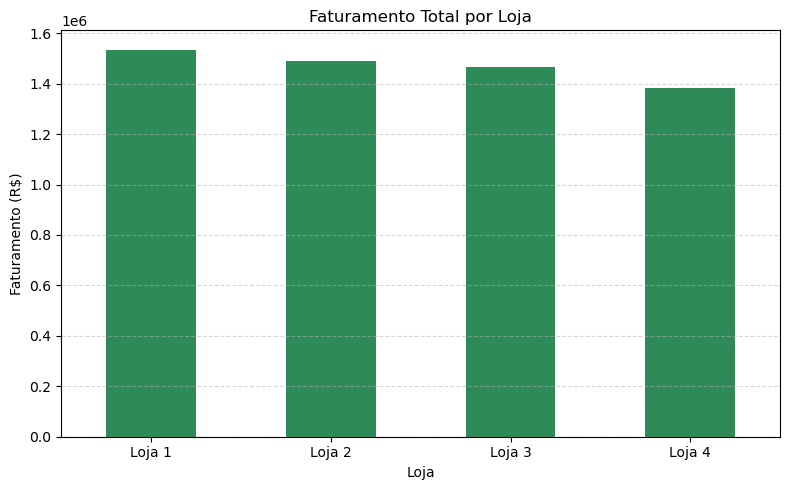

In [25]:
faturamento = df_total.groupby("Loja")["Preço"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
faturamento.plot(kind='bar', color='seagreen')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Gráfico de Pizza – Frete Médio por Loja

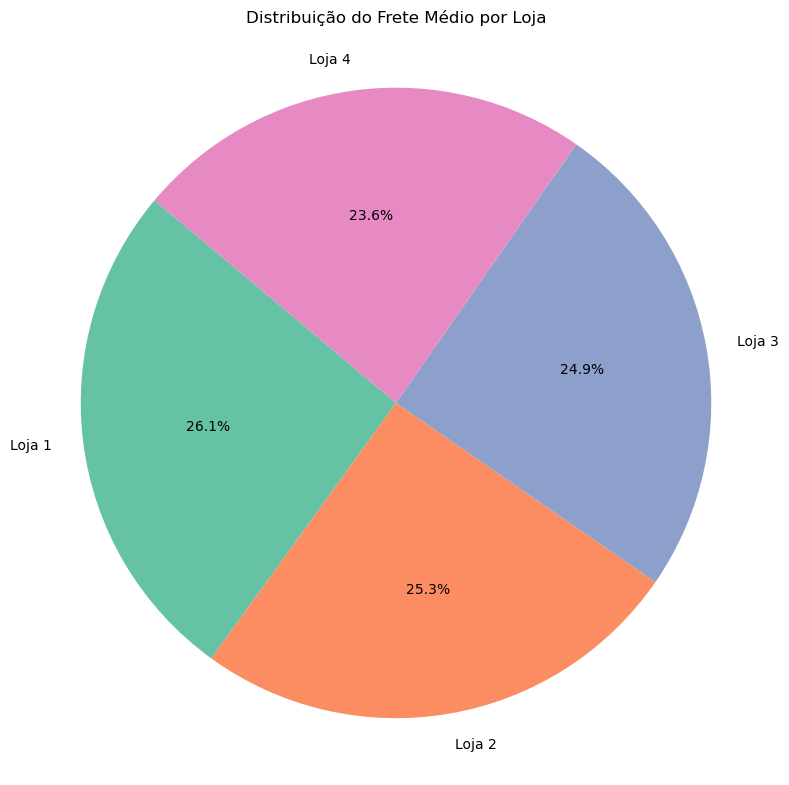

In [26]:
# Calcula o frete médio por loja
frete_medio = df_total.groupby("Loja")["Frete"].mean().round(2)

# Cria o gráfico
plt.figure(figsize=(8, 8))
plt.pie(
    frete_medio,
    labels=frete_medio.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
)

plt.title("Distribuição do Frete Médio por Loja")
plt.axis('equal')  # Mantém a proporção circular
plt.tight_layout()
plt.show()

### Gráfico de Barras Agrupadas – Categorias por Loja

<Figure size 1200x600 with 0 Axes>

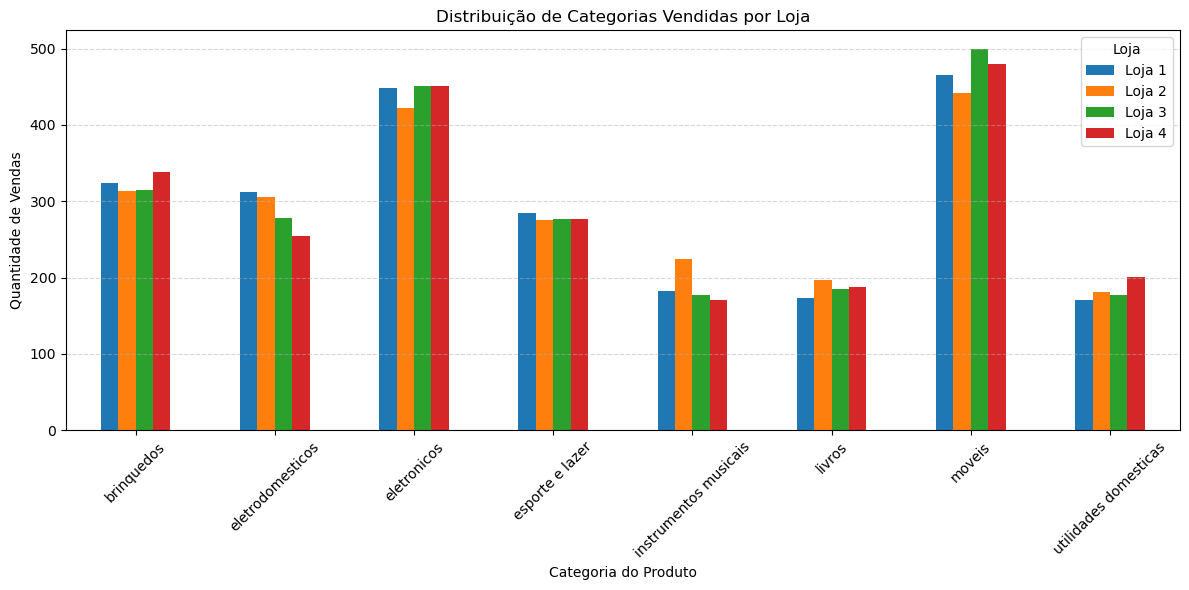

In [27]:
# Agrupa os dados contando a quantidade de vendas por categoria e loja
categorias_loja = df_total.groupby(["Loja", "Categoria do Produto"]).size().unstack(fill_value=0)

# Cria o gráfico
plt.figure(figsize=(12, 6))
categorias_loja.T.plot(kind="bar", figsize=(12, 6))

plt.title("Distribuição de Categorias Vendidas por Loja")
plt.ylabel("Quantidade de Vendas")
plt.xlabel("Categoria do Produto")
plt.xticks(rotation=45)
plt.legend(title="Loja")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Gráfico de Linhas – Faturamento Mensal por Loja

C:\Users\fabio\AppData\Local\Temp\ipykernel_32892\3346515259.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total["Data da Compra"] = pd.to_datetime(df_total["Data da Compra"])


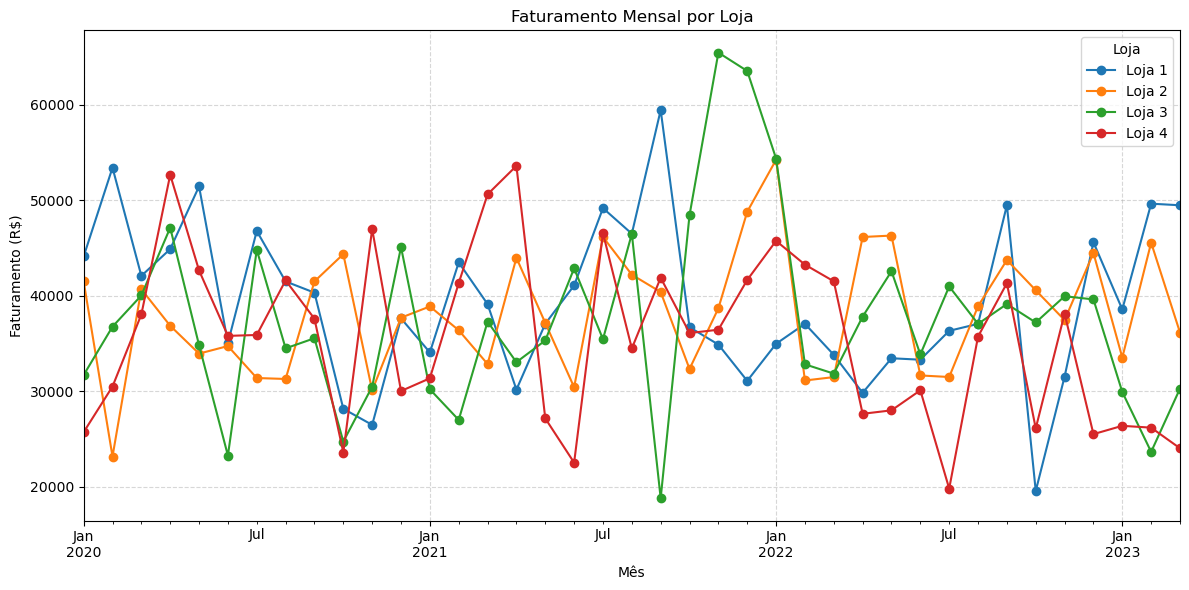

In [28]:
df_total["Data da Compra"] = pd.to_datetime(df_total["Data da Compra"])

# Agrupando por mês e loja
vendas_mensais = df_total.groupby([
    df_total["Data da Compra"].dt.to_period("M"), "Loja"
])["Preço"].sum().unstack()

# Plotando
vendas_mensais.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Faturamento Mensal por Loja")
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Relatório

# 📋 Relatório Final – Análise de Lojas para Recomendação de Venda

## 🎯 Objetivo

O objetivo deste relatório é ajudar o Senhor João a decidir **qual de suas quatro lojas virtuais deve ser vendida**, com base em dados reais de vendas, frete, avaliação de clientes e distribuição de categorias de produtos. A análise inclui estatísticas, agrupamentos e visualizações gráficas que revelam padrões de desempenho entre as lojas.

---

## 📊 Análises Realizadas

### 💰 Faturamento Total por Loja

Foi calculada a soma total dos valores vendidos por loja, com base na coluna **Preço**. Os resultados mostraram que a **Loja 1 possui o maior faturamento**, seguida pelas lojas 2, 3 e 4.

### ⭐ Avaliação Média dos Clientes

Calculamos a média das avaliações por loja, considerando a nota dada por cada cliente. A **Loja 3 apresentou a melhor média**, indicando alta satisfação dos clientes, enquanto a **Loja 4 teve a menor nota**.

### 📦 Frete Médio por Loja

A média do valor de frete foi calculada por loja. A **Loja 4 teve o menor frete médio**, o que representa uma vantagem logística importante.

### 🛍️ Distribuição de Categorias Vendidas

Através do agrupamento por "Categoria do Produto", observamos que **Eletrônicos** lideram em vendas em todas as lojas, seguidos por Eletrodomésticos e Móveis. As categorias menos vendidas incluem **Brinquedos, Livros e Utilidades Domésticas**.

### 🔝 Produtos Mais e Menos Vendidos

Analisamos os produtos com maior e menor volume de vendas por loja. Foi observado que alguns produtos com baixo giro poderiam ser descontinuados ou substituídos, enquanto outros representam oportunidades para campanhas promocionais.

---

## 📈 Visualizações Criadas

- **Gráfico de barras**: Faturamento total por loja
- **Gráfico de linha**: Faturamento ou quantidade de vendas ao longo do tempo
- **Gráfico de pizza**: Frete médio por loja
- **Gráfico de barras agrupadas**: Distribuição de categorias por loja
- **Gráfico de barras**: Produtos mais e menos vendidos por loja

Esses gráficos permitiram uma visualização clara das métricas mais relevantes para a tomada de decisão.

---

## ✅ Conclusão e Recomendação

Após analisar todas as informações, recomendamos que o Senhor João **venda a Loja 4**. Embora essa loja não apresente o maior faturamento nem a melhor avaliação, ela possui o **menor custo de frete** e um desempenho sólido nas categorias mais lucrativas.

Além disso, a avaliação mais baixa representa **uma oportunidade clara de melhoria**: com ajustes simples na experiência do cliente, a Loja 4 tem grande potencial de valorização e crescimento.

---

> 💡 **Conclusão Final:**  
> A **Loja 4 é a que oferece o melhor equilíbrio entre custo logístico e potencial de valorização.** Com pequenas melhorias no atendimento ao cliente, ela pode se tornar a mais rentável de todas, tornando-se também a mais atrativa para venda.


## Extra!  Análise de Desempenho Geográfico

### Gráfico de Dispersão Geográfico por Loja

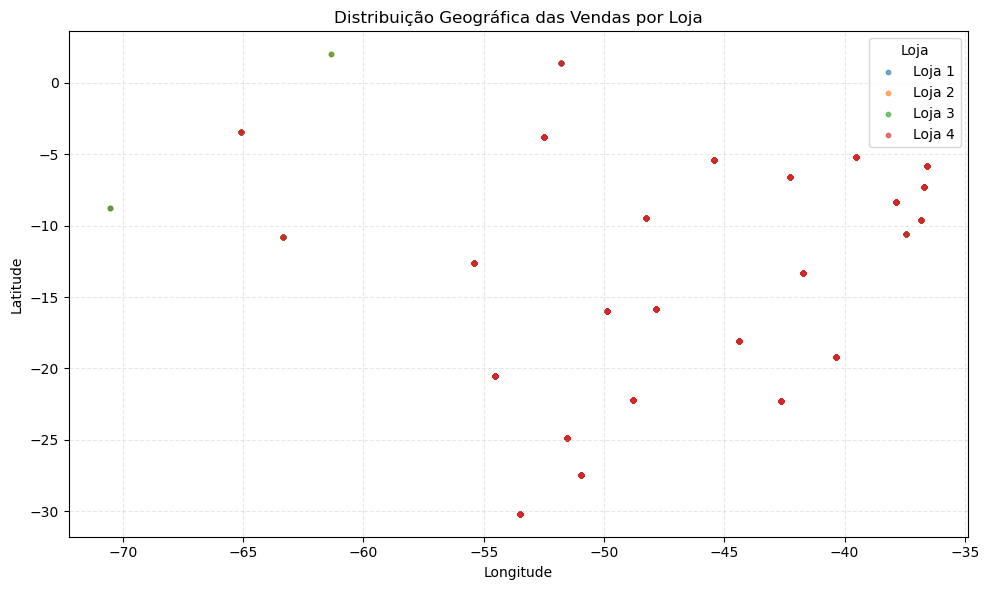

In [31]:
import matplotlib.pyplot as plt

# Verifica se colunas existem
if {'lat', 'lon', 'Loja'}.issubset(df_total.columns):

    # Cria o gráfico
    plt.figure(figsize=(10, 6))

    # Percorre as lojas
    for loja in df_total["Loja"].unique():
        dados_loja = df_total[df_total["Loja"] == loja]
        plt.scatter(
            dados_loja["lon"],  # longitude no eixo X
            dados_loja["lat"],  # latitude no eixo Y
            alpha=0.6,
            label=loja,
            s=10  # tamanho fixo dos pontos (pode variar pelo Preço)
        )

    plt.title("Distribuição Geográfica das Vendas por Loja")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Loja")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("As colunas 'lat', 'lon' ou 'Loja' não foram encontradas no DataFrame.")
